#不均一分散
『Rによる計量経済学』第6章「不均一分散」をPythonで実行する。  
テキスト付属データセット(「k0601.csv」等)については出版社サイトよりダウンロードしてください。

例題6-1
-----
「k0601.csv」を用いた均一分散のデータである場合の回帰分析。   
BP統計量による不均一分散の有無の仮説検定を行います。

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smsdia
import matplotlib.pyplot as plt

In [3]:
# データ読み込み
data = pd.read_csv('example/k0601.csv')

In [4]:
# 説明変数設定
X = data['X']
X = sm.add_constant(X)
X

,const,X
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,1,9
9,1,10


In [5]:
# 被説明変数設定
Y = data['Y']
Y

0     1
1     3
2     4
3     5
4     4
5     6
6     7
7     8
8    10
9    10
Name: Y, dtype: int64

In [6]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     153.2
Date:                Fri, 17 Jul 2015   Prob (F-statistic):           1.69e-06
Time:                        02:37:42   Log-Likelihood:                -9.5470
No. Observations:                  10   AIC:                             23.09
Df Residuals:                       8   BIC:                             23.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5333      0.480      1.111      0.2

/Users/yoshimasa/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


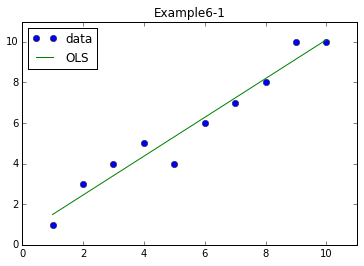

In [7]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data["X"], results.fittedvalues, label="OLS")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('Example6-1')
plt.legend(loc=2)
plt.show()

In [8]:
# 残差(residual) 
results.resid

0   -0.490909
1    0.551515
2    0.593939
3    0.636364
4   -1.321212
5   -0.278788
6   -0.236364
7   -0.193939
8    0.848485
9   -0.109091
dtype: float64

In [9]:
# 被説明変数(endogenous ) http://statsmodels.sourceforge.net/devel/endog_exog.html
results.model.endog

array([ 1,  3,  4,  5,  4,  6,  7,  8, 10, 10])

In [10]:
# 説明変数(exogenous)
results.model.exog

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10]])

###Breush-Pagan Test
BP統計量を計算するにあたって、[statsmodels.stats.diagnostic.het_breushpagan()](http://nipy.bic.berkeley.edu/nightly/statsmodels/doc/html/generated/statsmodels.stats.diagnostic.het_breushpagan.html?highlight=breush)を使う。  
```
-----
statsmodels.stats.diagnostic.het_breushpagan(resid, exog_het)

Parameters:	
    resid : arraylike, (nobs,)
        For the Breush-Pagan test, this should be the residual of a regression.
    exog_het : array_like, (nobs, nvars)
        This contains variables that might create data dependent heteroscedasticity.
    
Returns:	
    lm : float
        lagrange multiplier statistic
    lm_pvalue :float :
        p-value of lagrange multiplier test
    fvalue : float
        f-statistic of the hypothesis that the error variance does not depend on x
    f_pvalue : float
        p-value for the f-statistic
-----
```

In [11]:
smsdia.het_breushpagan(results.resid, results.model.exog)

(0.14634905061460701,
 0.7020490409239537,
 0.11881813258159758,
 0.73920658055186672)

これの1つ目がBP統計量で、2つ目がP値。  
見やすいように整えておく。

In [12]:
BP = smsdia.het_breushpagan(results.resid, results.model.exog)
print('Breusch-Pagan test : ')
print('BP = ', BP[0])
print('p-value = ', BP[1])

Breusch-Pagan test : 
BP =  0.146349050615
p-value =  0.702049040924


よって、 BP=0.14630.1463となり0に近い値であることがわかる。  
P値は0.702となり有意水準10%でも帰無仮説BP=0を棄却することはできず、均一分散であると結論することができます。

例題6-2
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。   
BP統計量による不均一分散の有無の仮説検定を行います。

データを読み込みます。

In [13]:
data = pd.read_csv('example/k0602.csv')

In [14]:
# 説明変数設定
X = data['X']
X = sm.add_constant(X)
X

,const,X
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,1,9
9,1,10


In [15]:
# 被説明変数設定
Y = data['Y']
Y

0     1
1     2
2     3
3     5
4     4
5     7
6     8
7     5
8    10
9     6
Name: Y, dtype: int64

In [16]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     15.91
Date:                Fri, 17 Jul 2015   Prob (F-statistic):            0.00401
Time:                        02:37:42   Log-Likelihood:                -18.366
No. Observations:                  10   AIC:                             40.73
Df Residuals:                       8   BIC:                             41.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0000      1.160      0.862      0.4

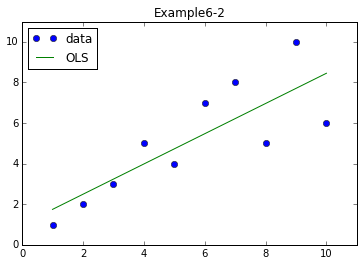

In [17]:
# グラフ生成
plt.plot(data["X"], data["Y"], 'o', label="data")
plt.plot(data["X"], results.fittedvalues, label="OLS")
plt.xlim(min(data["X"])-1, max(data["X"])+1)
plt.ylim(min(data["Y"])-1, max(data["Y"])+1)
plt.title('Example6-2')
plt.legend(loc=2)
plt.show()

In [18]:
BP = smsdia.het_breushpagan(results.resid, results.model.exog)
print('Breusch-Pagan test : ')
print('BP = ', BP[0])
print('p-value = ', BP[1])

Breusch-Pagan test : 
BP =  8.79993601378
p-value =  0.00301241110018


P値は0.003より有意水準1%でも帰無仮説BP=0を棄却することができ、不均一分散であると結論することができます。

例題6-3
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。  
不均一分散が存在する場合、変数を対数化することによって不均一分散の状態の解消を行います。

先ほど読み込んだ「k0602.csv」のデータから変数の対数化を行います。  
dataの中に新しいコラム「lnX」「lnY」を追加します。

In [19]:
data["lnX"] = np.log(data["X"])
data["lnY"] = np.log(data["Y"])
data

,i,X,Y,lnX,lnY
0,1,1,1,0.000000,0.000000
1,2,2,2,0.693147,0.693147
2,3,3,3,1.098612,1.098612
3,4,4,5,1.386294,1.609438
4,5,5,4,1.609438,1.386294
5,6,6,7,1.791759,1.945910
6,7,7,8,1.945910,2.079442
7,8,8,5,2.079442,1.609438
8,9,9,10,2.197225,2.302585
9,10,10,6,2.302585,1.791759


In [20]:
# 説明変数設定
X = data['lnX']
X = sm.add_constant(X)
X

,const,lnX
0,1,0.000000
1,1,0.693147
2,1,1.098612
3,1,1.386294
4,1,1.609438
5,1,1.791759
6,1,1.945910
7,1,2.079442
8,1,2.197225
9,1,2.302585


In [21]:
# 被説明変数設定
Y = data['lnY']
Y

0    0.000000
1    0.693147
2    1.098612
3    1.609438
4    1.386294
5    1.945910
6    2.079442
7    1.609438
8    2.302585
9    1.791759
Name: lnY, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    lnY   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     56.59
Date:                Fri, 17 Jul 2015   Prob (F-statistic):           6.78e-05
Time:                        02:37:43   Log-Likelihood:                0.42787
No. Observations:                  10   AIC:                             3.144
Df Residuals:                       8   BIC:                             3.749
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1124      0.196      0.573      0.5

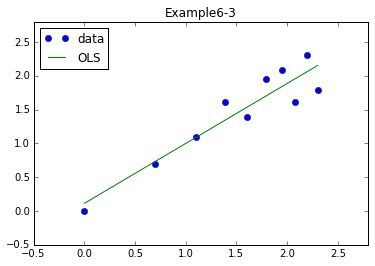

In [22]:
# OLSの実行(Ordinary Least Squares: 最小二乗法)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())
# グラフ生成
plt.plot(data["lnX"], data["lnY"], 'o', label="data")
plt.plot(data["lnX"], results.fittedvalues, label="OLS")
plt.xlim(min(data["lnX"])-0.5, max(data["lnX"])+0.5)
plt.ylim(min(data["lnY"])-0.5, max(data["lnY"])+0.5)
plt.title('Example6-3')
plt.legend(loc=2)
plt.show()

In [23]:
# BPテスト
BP = smsdia.het_breushpagan(results.resid, results.model.exog)
print('Breusch-Pagan test : ')
print('BP = ', BP[0])
print('p-value = ', BP[1])

Breusch-Pagan test : 
BP =  5.64430373876
p-value =  0.0175121687183


あれ？まだ不均一分散残ってますね笑  

ちなみに本書では何故か対数化する過程で「k0602.csv」の元のX,Yデータが変わってて対数化による不均一分散の解消が成功しているかのごとくなっています笑

「k0602.csv」と「k0603.csv」のデータ比較。

In [24]:
data6_2 = pd.read_csv('example/k0602.csv')
data6_3 = pd.read_csv('example/k0603.csv')

In [25]:
data6_2

,i,X,Y
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,5
4,5,5,4
5,6,6,7
6,7,7,8
7,8,8,5
8,9,9,10
9,10,10,6


In [26]:
data6_3

,i,X,Y,lnX,lnY
0,1,1.0,1.0,0.000000,0.000000
1,2,1.5,2.5,0.405465,0.916291
2,3,2.0,2.0,0.693147,0.693147
3,4,2.5,3.5,0.916291,1.252763
4,5,3.0,3.0,1.098612,1.098612
5,6,4.0,6.0,1.386294,1.791759
6,7,6.0,8.0,1.791759,2.079442
7,8,7.0,5.0,1.945910,1.609438
8,9,9.0,10.0,2.197225,2.302585
9,10,10.0,6.0,2.302585,1.791759


やっぱりX, Yの値が変わってる笑  
とりあえず「k0603.csv」の場合の回帰も行います。

                            OLS Regression Results                            
Dep. Variable:                    lnY   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     38.88
Date:                Fri, 17 Jul 2015   Prob (F-statistic):           0.000250
Time:                        02:37:43   Log-Likelihood:                -1.2572
No. Observations:                  10   AIC:                             6.514
Df Residuals:                       8   BIC:                             7.120
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3162      0.193      1.642      0.1

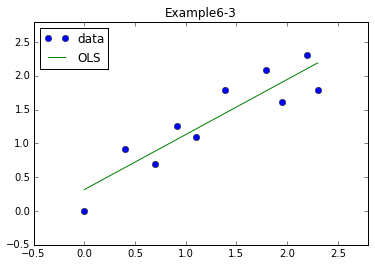

In [27]:
X = data6_3['lnX']
X = sm.add_constant(X)
Y = data6_3['lnY']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

plt.plot(data6_3["lnX"], data6_3["lnY"], 'o', label="data")
plt.plot(data6_3["lnX"], results.fittedvalues, label="OLS")
plt.xlim(min(data6_3["lnX"])-0.5, max(data6_3["lnX"])+0.5)
plt.ylim(min(data6_3["lnY"])-0.5, max(data6_3["lnY"])+0.5)
plt.title('Example6-3')
plt.legend(loc=2)
plt.show()

In [28]:
BP = smsdia.het_breushpagan(results.resid, results.model.exog)
print('Breusch-Pagan test : ')
print('BP = ', BP[0])
print('p-value = ', BP[1])

Breusch-Pagan test : 
BP =  0.837612142422
p-value =  0.360080593462


例題6-4
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。
不均一分散が存在する場合、第3の変数を基準とした比率に変換することによって不均一分散の状態の解消を行います。

例題6-4で使う「k0604.csv」も「k0602.csv」とデータが異なるので、「k0602.csv」を基にしたデータの加工は省き、直接行います。

In [29]:
data = pd.read_csv('example/k0604.csv')

ちなみにデータの中身はこのようになっていて、  
XZ = X / Z  
YZ = Y / Z  
で簡単に求めることが出来ます。  

In [30]:
data

,i,X,Y,Z,XZ,YZ
0,1,1.0,1.0,0.8,1.250000,1.250000
1,2,1.5,2.5,1.5,1.000000,1.666667
2,3,2.0,2.0,2.5,0.800000,0.800000
3,4,2.5,3.5,4.0,0.625000,0.875000
4,5,3.0,3.0,3.0,1.000000,1.000000
5,6,4.0,6.0,3.5,1.142857,1.714286
6,7,6.0,8.0,4.0,1.500000,2.000000
7,8,7.0,5.0,7.5,0.933333,0.666667
8,9,9.0,10.0,9.0,1.000000,1.111111
9,10,10.0,6.0,12.0,0.833333,0.500000


                            OLS Regression Results                            
Dep. Variable:                     YZ   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     11.74
Date:                Fri, 17 Jul 2015   Prob (F-statistic):            0.00900
Time:                        02:37:43   Log-Likelihood:                -2.0924
No. Observations:                  10   AIC:                             8.185
Df Residuals:                       8   BIC:                             8.790
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4025      0.468     -0.861      0.4

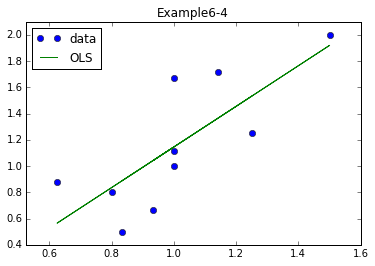

In [31]:
X = data['XZ']
X = sm.add_constant(X)
Y = data['YZ']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

plt.plot(data["XZ"], data["YZ"], 'o', label="data")
plt.plot(data["XZ"], results.fittedvalues, label="OLS")
plt.xlim(min(data["XZ"])-0.1, max(data["XZ"])+0.1)
plt.ylim(min(data["YZ"])-0.1, max(data["YZ"])+0.1)
plt.title('Example6-4')
plt.legend(loc=2)
plt.show()

In [32]:
BP = smsdia.het_breushpagan(results.resid, results.model.exog)
print('Breusch-Pagan test : ')
print('BP = ', BP[0])
print('p-value = ', BP[1])

Breusch-Pagan test : 
BP =  0.385878792304
p-value =  0.534473677685
